https://www.datacamp.com/tutorial/wordcloud-python

In [1]:
#Additional Helper functions can be found in 'src/'

import sys
sys.path.append( '../../src' )
import pandas as pd

from pandas_functions import dataFrame_info
from documentParser import doc_preparer , getTopWordFreq 
from modelingResultPrettyPrinter import prettyPrintGridCVResults, prettyPrintCVScores

from nltk.corpus import stopwords
sw = stopwords.words('english')

In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

## Loading

In [3]:
dataFolder_path = '../../data/'
data_df = pd.read_csv(dataFolder_path+'judge_1377884607_tweet_product_company.csv')

In [4]:
data_df.head(3)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion


In [5]:
data_df.shape

(8721, 3)

## Cleaning

Let's rename the columns for ease of use. Note that `product` is a reserved word in Python; for the second column, initially titled `emotion_in_tweet_is_directed_at`, we use `product_name`.

In [6]:
data_df.rename(columns = {'tweet_text': 'text',
                     'emotion_in_tweet_is_directed_at': 'product_name',
                     'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'},
               inplace = True)

In [7]:
data_df.isna().sum()

text               1
product_name    5552
emotion            0
dtype: int64

There is an extremely large number of nulls in `product name`. For the purpose of modeling, the columns we specifically care about are the `text` and `emotion` columns, since we are going to try and predict the emotional quotient of a tweet. Lets look at the one null record.

In [8]:
data_df[data_df.text.isna()]

,text,product_name,emotion
6,NaN,NaN,No emotion toward brand or product


This record has no relevant information associated with it. No text, no emotion, no product. It was probably captured erroneously, or was probably unintentionally cleared after capturing. In either case, no useful information can be drawn from it. We shall drop this record

In [9]:
data_df.dropna(subset=['text'],inplace=True)
data_df.shape

(8720, 3)

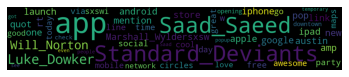

In [10]:
text = [
 'Standard_Deviants',
 'Saad_Saeed',
 'Luke_Dowker',
 'Will_Norton',
 'Marshall_Wylder'
 'sxsw',
 'mention',
 'ipad',
 'link',
 'rt',
 'apple',
 'google',
 'iphone',
 'store',
 'quot',
 'app',
 'new',
 'austin',
 'amp',
 'pop',
 'android',
 'get',
 'launch',
 'one',
 'party',
 'great',
 'line',
 'time',
 'free',
 'via',
 'social',
 'circles',
 'cool',
 'today',
 'day',
 'like',
 'w',
 'maps',
 'mobile',
 'sxswi',
 'go',
 'awesome',
 'good',
 'love',
 'network',
 'opening',
 'downtown',
 'check',
 'temporary',
 'people',
 'apps',
 'got',
 'see',
 'popup',
 'even',
 'Saad']
wc = WordCloud(max_words = 1000,
               width = 1600,
               height = 300,
               collocations=False).generate(",".join(text))
plt.axis("off")
plt.imshow(wc);

In [11]:
word_freq = getTopWordFreq(data_df,'text',10000, sw)
len(word_freq)

8980

In [12]:
data_df['new_text'] = data_df['text'].map(lambda x:doc_preparer(x,stem=False))
data_df

,text,product_name,emotion,new_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,iphone hrs tweeting rise dead need upgrade plu...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,hope year's festival crashy year's iphone app ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,great stuff fri sxsw marissa mayer google tim ...
...,...,...,...,...
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion,ipad everywhere sxsw link
8717,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,wave buzz rt interrupt regularly scheduled sxs...
8718,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,google's zeiger physician never reported poten...
8719,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,verizon iphone customers complained time fell ...


In [56]:
len(" ".join(data_df['new_text']))

621289

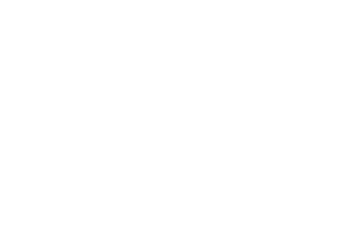

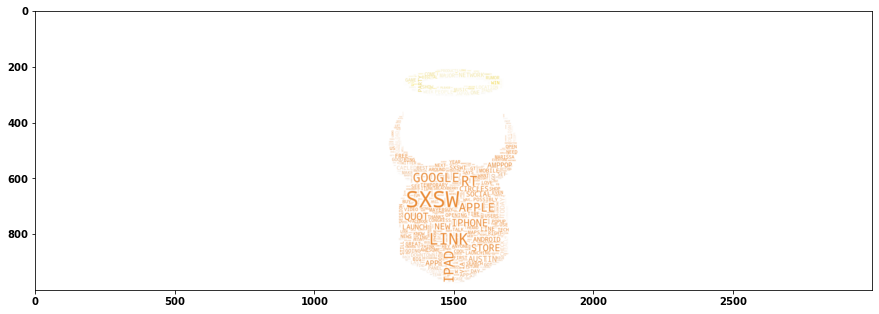

In [85]:
stopwords = set(STOPWORDS)


mask = np.array(Image.open("../../images/Splash Header.png"))
image_colors = ImageColorGenerator(mask)


wc = WordCloud(
    max_words=10000,
    mask=mask,
    stopwords=stopwords,
    background_color="white",
    collocations=False,
    normalize_plurals=False,
    max_font_size=80,
    scale=1
)

wc.generate(" ".join(data_df['new_text'].str.upper()))

wc.recolor(color_func=image_colors, random_state=3)

plt.axis("off")
plt.figure(figsize=(15, 8))

plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

wc.to_file("Header_wc-white.png")

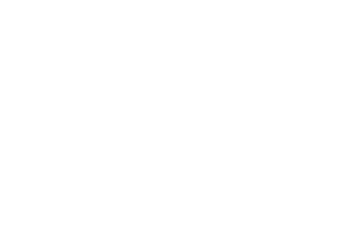

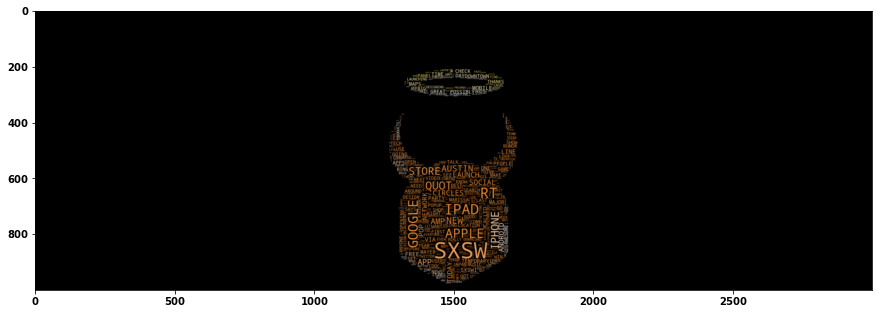

In [86]:
stopwords = set(STOPWORDS)
stopwords
stopwords.update(['link'])


mask = np.array(Image.open("../../images/Splash Header.png"))
image_colors = ImageColorGenerator(mask)


wc = WordCloud(
    max_words=10000,
    mask=mask,
    stopwords=stopwords,
#     background_color="white",
    collocations=False,
    normalize_plurals=False,
    max_font_size=80,
    scale=1
)

wc.generate(" ".join(data_df['new_text'].str.upper()))

wc.recolor(color_func=image_colors, random_state=3)

plt.axis("off")
plt.figure(figsize=(15, 8))

plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

wc.to_file("Header_wc-Black.png")